## Loan Approval Prediction

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

## Executive Summary

## Loan Approval Prediction Project

This project utilizes a dataset containing financial records to predict loan approval outcomes using machine learning techniques. Key steps include data preprocessing, exploratory data analysis (EDA), and predictive modeling using a Random Forest Classifier.

### Key Highlights:

#### 1. Data Preparation: 

Cleaned and preprocessed the dataset by handling missing values, encoding categorical variables, and normalizing numerical features.

#### 2. Exploratory Data Analysis (EDA): 
Conducted descriptive analytics to visualize distributions and correlations among variables. Notably, a strong negative correlation (-0.77) was observed between CIBIL score and loan approval status, indicating its significant impact on lending decisions.

#### 3. Predictive Modeling: 
Built a Random Forest Classifier model to predict loan approval status based on selected features. Achieved an accuracy of 98%, demonstrating the model's effectiveness in distinguishing between approved and rejected loans.

#### 4. Feature Importance: 
Identified key predictors influencing loan approval decisions through feature importance analysis. CIBIL score emerged as the most influential factor, underscoring its critical role in credit risk assessment.

In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')

In [27]:
# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Strip leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Handle missing values (if any)
data.fillna(data.median(), inplace=True)

# Convert specific columns to integer if needed
data['loan_id'] = data['loan_id'].astype(int)
data['no_of_dependents'] = data['no_of_dependents'].astype(int)

# Encode categorical variables
binary_encoding = {
    'education': {'Graduate': 1, 'Not Graduate': 0},
    'self_employed': {'Yes': 1, 'No': 0},
    'loan_status': {'Approved': 1, 'Rejected': 0}
}

data.replace(binary_encoding, inplace=True)

# Convert remaining object columns to numeric
label_encoder = LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education'])
data['self_employed'] = label_encoder.fit_transform(data['self_employed'])
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

In [29]:
# Verify data types and non-null counts
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int32
 1   no_of_dependents          4269 non-null   int32
 2   education                 4269 non-null   int32
 3   self_employed             4269 non-null   int32
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int32
dtypes: int32(5), int64(8)
memory usage: 350.3 KB
None
   loan_id  no_of_dependents  education  se

In [30]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split the dataset into features (X) and target (y)
X = data.drop('loan_status', axis=1)  # Assuming 'loan_status' is the target variable
y = data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the first few rows of the processed dataset
print(X_train.head())
print(y_train.head())

      loan_id  no_of_dependents  education  self_employed  income_annum  \
3404     3405                 4          1              0     -0.804958   
781       782                 3          1              1      1.724873   
3002     3003                 4          0              1     -0.555538   
4047     4048                 3          1              0      0.477773   
3391     3392                 2          0              1     -0.626801   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
3404    -0.755720   0.542970    -1.269856                 -0.657035   
781      0.582434  -1.208798     1.537403                  2.895240   
3002    -0.490301  -0.508091     1.641805                 -1.118369   
4047     0.869972  -0.508091    -0.463639                  0.711590   
3391    -0.932666  -0.508091     1.421400                 -0.949213   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
3404                -0.882579            -0.662036 

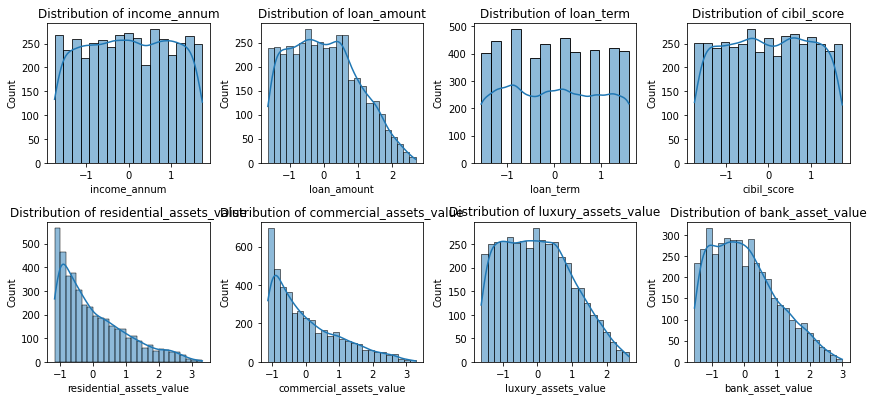

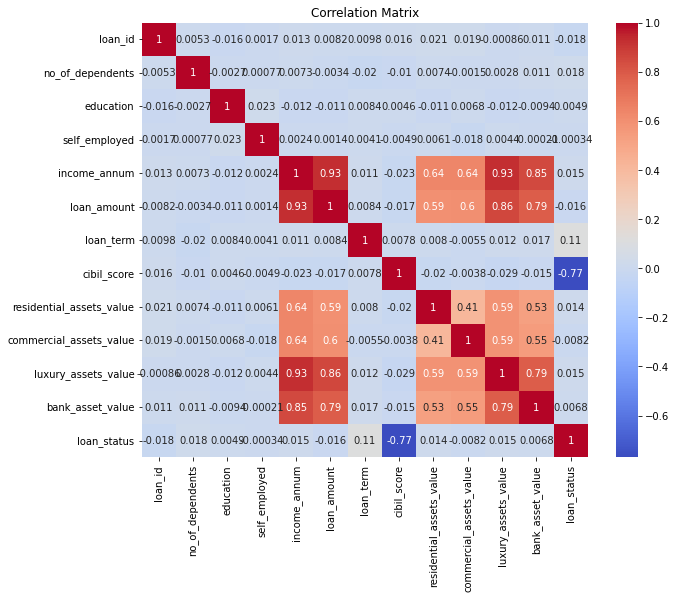

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Descriptive Analytics
def descriptive_analytics(data):
    # Plot the distribution of numerical features
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numerical_cols):
        plt.subplot(3, 4, i+1)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

descriptive_analytics(data)

### Correlation between CIBIL Score and Loan Status
The correlation matrix reveals insightful relationships between variables, crucial for understanding factors influencing loan approval decisions. One standout observation is the substantial negative correlation between cibil_score and loan_status, calculated at approximately -0.77.

#### Negative Correlation Strength: 
The correlation coefficient of -0.77 indicates a strong negative relationship between the applicant's CIBIL score and the loan approval status. This suggests that as the CIBIL score increases (indicating better creditworthiness), the likelihood of loan rejection decreases significantly.

#### Impact on Loan Approval Decisions: 
Financial institutions typically use CIBIL scores as a key determinant in assessing credit risk. A higher score often reflects a history of responsible credit behavior, influencing favorable loan approval outcomes. Conversely, lower scores may trigger heightened scrutiny or potential rejection due to perceived higher risk.

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       810
           1       0.98      0.95      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.97      1281

Confusion Matrix:
[[800  10]
 [ 22 449]]


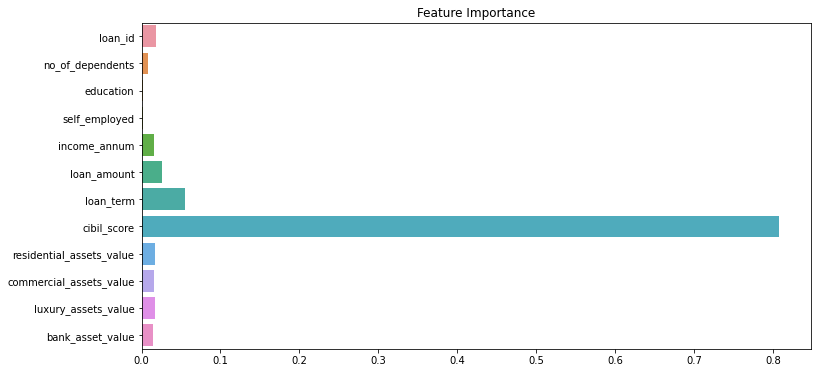

In [33]:
# Step 2: Predictive Analytics
def loan_approval_model(X_train, X_test, y_train, y_test):
    # Train a RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    # Feature importance
    feature_importance = model.feature_importances_
    features = X.columns
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance, y=features)
    plt.title('Feature Importance')
    plt.show()

loan_approval_model(X_train, X_test, y_train, y_test)